In [103]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import warnings

plt.rcParams['figure.figsize'] = [14, 7]
warnings.filterwarnings("ignore")

df = pd.read_csv('merged1538990253.771527.csv')

In [104]:
df.head()

,tweet_id,Unnamed: 0,created_at,handle,mined_at,retweet_count,text
0,1048727214253113349,0,Sun Oct 07 00:10:26 +0000 2018,superwoman⚔,2018-10-06 21:10:50.788029,2218,RT @OJARDELITO: *PESQUISA - VÉSPERA DA ELEIÇÃO...
1,1048727190899232768,1,Sun Oct 07 00:10:21 +0000 2018,Alan Izaias Garus Prodelik,2018-10-06 21:10:50.788029,0,"Com os números recentes do Ibope e Datafolha,..."
2,1048727190437879808,2,Sun Oct 07 00:10:21 +0000 2018,Rodrigo,2018-10-06 21:10:50.788029,239,RT @congemfoco: Nossa opinião: a dupla Bolsona...
3,1048727185643720704,3,Sun Oct 07 00:10:20 +0000 2018,Gomes Miguel,2018-10-06 21:10:50.788029,668,RT @TSEjusbr: Quem registrar o voto com máquin...
4,1048727170594607110,4,Sun Oct 07 00:10:16 +0000 2018,⚜ TelBoni 🌞,2018-10-06 21:10:50.788029,0,"Mano. Meu. Paulista come cocô mesmo, PSDB ajud..."


In [105]:
df.shape

(271247, 7)

In [106]:
from datetime import datetime, timezone

def twitterdate_to_datetime(twitterdate):
    return datetime.strptime(twitterdate, '%a %b %d %X %z %Y').replace(tzinfo=timezone.utc).astimezone(tz=None)
    
def datetime_to_integer(datetime):
    return round(datetime.timestamp())

df['created_at'] = df['created_at'].map(twitterdate_to_datetime)
df['created_at_int'] = df['created_at'].map(datetime_to_integer)
df['created_at_day'] = df['created_at'].map(lambda x: x.day)
df['created_at_hour_int'] = df['created_at'].map(lambda x: x.time().hour)
df['created_at_hour_float'] = df['created_at'].map(lambda x: x.time().hour + (x.time().minute * x.time().second) / 3600)

df_day = df[df['created_at_day'] == 7]

In [107]:
df.head()

,tweet_id,Unnamed: 0,created_at,handle,mined_at,retweet_count,text,created_at_int,created_at_day,created_at_hour_int,created_at_hour_float
0,1048727214253113349,0,2018-10-06 21:10:26-03:00,superwoman⚔,2018-10-06 21:10:50.788029,2218,RT @OJARDELITO: *PESQUISA - VÉSPERA DA ELEIÇÃO...,1538871026,6,21,21.072222
1,1048727190899232768,1,2018-10-06 21:10:21-03:00,Alan Izaias Garus Prodelik,2018-10-06 21:10:50.788029,0,"Com os números recentes do Ibope e Datafolha,...",1538871021,6,21,21.058333
2,1048727190437879808,2,2018-10-06 21:10:21-03:00,Rodrigo,2018-10-06 21:10:50.788029,239,RT @congemfoco: Nossa opinião: a dupla Bolsona...,1538871021,6,21,21.058333
3,1048727185643720704,3,2018-10-06 21:10:20-03:00,Gomes Miguel,2018-10-06 21:10:50.788029,668,RT @TSEjusbr: Quem registrar o voto com máquin...,1538871020,6,21,21.055556
4,1048727170594607110,4,2018-10-06 21:10:16-03:00,⚜ TelBoni 🌞,2018-10-06 21:10:50.788029,0,"Mano. Meu. Paulista come cocô mesmo, PSDB ajud...",1538871016,6,21,21.044444


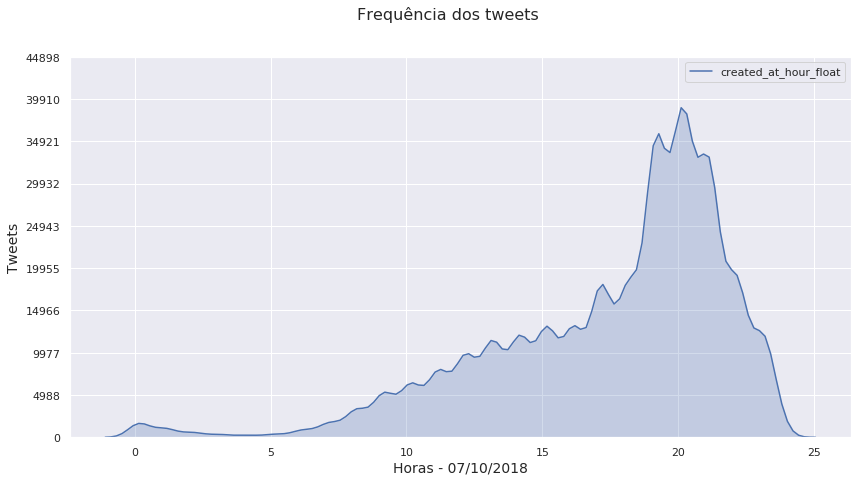

In [108]:
fig = sns.kdeplot(df_day['created_at_hour_float'], shade=True)

fig.figure.suptitle("Frequência dos tweets", fontsize = 16)

plt.xlabel('Horas - 07/10/2018', fontsize=14)

plt.ylabel('Tweets', fontsize=14)
plt.yticks(fig.get_yticks(), (fig.get_yticks() * df_day.shape[0]).astype(int))
plt.show()

In [109]:
def kdeplot_by_keywords(keyword_matrix):
    legends = []
    
    for keywords in keyword_matrix:
        sub_df = df_day[df_day['text'].str.contains('|'.join(keywords), regex=True, case=False)]
        fig = sns.lineplot(data=sub_df['created_at_hour_int'].value_counts())
        legends.append(', '.join(keywords))
    
    fig.figure.suptitle('Ocorrências de palavras-chaves', fontsize = 16)

    plt.xlabel('Horas - 07/10/2018', fontsize=14)
    plt.ylabel('Ocorrências', fontsize=14)
    plt.legend(legends)


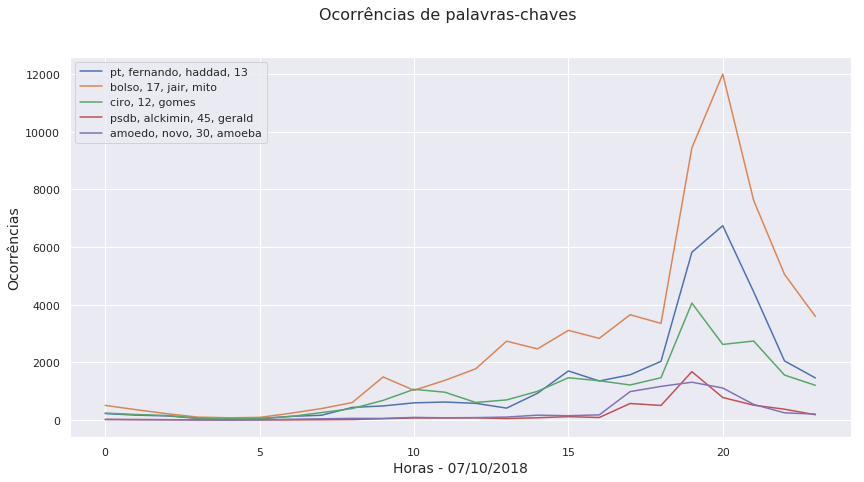

In [110]:
kdeplot_by_keywords([['pt', 'fernando', 'haddad', '13'], ['bolso', '17', 'jair', 'mito'], ['ciro', '12', 'gomes'], ['psdb', 'alckimin', '45', 'gerald'],['amoedo', 'novo', '30', 'amoeba']])

In [111]:
def kdeplot_by_keywords_timegap(keyword_matrix, min_gap, max_gap):
    legends = []
    
    _df_day = df_day[(df_day['created_at_hour_int'] >= min_gap) & (df['created_at_hour_int'] <= max_gap)]
     
    for keywords in keyword_matrix:
        sub_df = _df_day[_df_day['text'].str.contains('|'.join(keywords), regex=True, case=False)]
        fig = sns.lineplot(data=sub_df['created_at_hour_int'].value_counts())
        legends.append(', '.join(keywords))
    
    fig.figure.suptitle('Ocorrências de palavras-chaves', fontsize = 16)

    plt.xlabel('Horas - 07/10/2018', fontsize=14)
    plt.ylabel('Ocorrências', fontsize=14)
    plt.legend(legends)

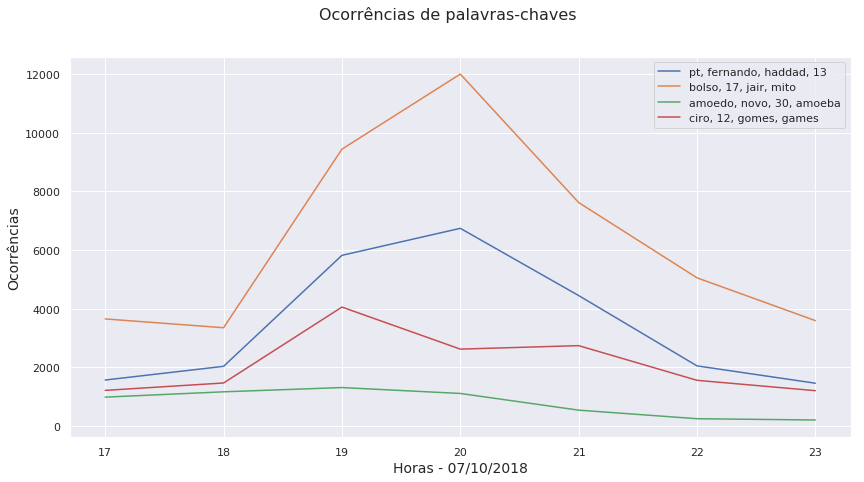

In [112]:
kdeplot_by_keywords_timegap([['pt', 'fernando', 'haddad', '13'], ['bolso', '17', 'jair', 'mito'], ['amoedo', 'novo', '30', 'amoeba'], ['ciro', '12', 'gomes', 'games']], 17, 24)

In [213]:
from collections import Counter

def flatten_matrix(matrix):
    res = []
    for array in matrix:
        for item in array:
            res.append(item)
            
    return res

def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

def filter_keywords(text):
    res = []
    prohibited = ['rt', ' ']

    for word in text.split(' '):
        word = word.lower()
        if word not in prohibited and 'http' not in word:  
            filtered_word = ''.join(list(filter(lambda char: char.isalpha(), list(word))))
            res.append(filtered_word)
        
    return res

def generate_counter_timegap(min_gap=0, max_gap=24):
    _df_day = df_day[(df_day['created_at_hour_int'] >= min_gap) & (df_day['created_at_hour_int'] <= max_gap)]
    matrix = _df_day['text'].map(filter_keywords)
    arr = flatten_matrix(matrix)
    
    return Counter(arr), arr

In [218]:
c, arr = generate_counter_timegap()

c.most_common(30)

[('', 144314),
 ('de', 113527),
 ('o', 99309),
 ('eleições', 95968),
 ('e', 83716),
 ('a', 80182),
 ('que', 68107),
 ('no', 61124),
 ('em', 59878),
 ('do', 51627),
 ('não', 50673),
 ('é', 49602),
 ('bolsonaro', 47083),
 ('eleicoes', 46379),
 ('com', 33935),
 ('para', 31981),
 ('na', 31054),
 ('da', 30530),
 ('nordeste', 25245),
 ('turno', 21587),
 ('votos', 20816),
 ('urna', 20777),
 ('se', 20567),
 ('eu', 20494),
 ('ciro', 18730),
 ('urnas', 18368),
 ('haddad', 17820),
 ('as', 17608),
 ('brasil', 17373),
 ('das', 16456)]

In [219]:
c2, arr2 = generate_counter_timegap(min_gap=0, max_gap=1)

c2.most_common(30)

[('de', 1671),
 ('', 1627),
 ('o', 1366),
 ('a', 1107),
 ('e', 885),
 ('que', 777),
 ('eleições', 755),
 ('é', 743),
 ('bolsonaro', 584),
 ('para', 568),
 ('não', 514),
 ('da', 480),
 ('em', 377),
 ('eleicoes', 362),
 ('do', 355),
 ('por', 337),
 ('no', 334),
 ('se', 333),
 ('presidente', 284),
 ('um', 280),
 ('na', 268),
 ('vai', 248),
 ('ciro', 241),
 ('dia', 236),
 ('você', 234),
 ('máximo', 229),
 ('favor', 223),
 ('pessoas', 220),
 ('ser', 219),
 ('com', 209)]

In [221]:
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

stopwords = ['de', 'o', 'e', 'a', 'do', 'da', 'gome', 'htt']

def generate_wordcloud_timegap(mask, max_words, max_font_size, bg_color, filename, min_gap=0, max_gap=24):
    
    c, text_arr = generate_counter_timegap(min_gap=min_gap, max_gap=max_gap)
    
    wordcloud = WordCloud(stopwords=stopwords, mask=mask, background_color=bg_color, mode="RGBA", 
                          max_words=max_words, max_font_size=max_font_size)
    wordcloud.generate(' '.join(text_arr))

    image_colors = ImageColorGenerator(mask)

    plt.figure(figsize=[20,12])
    plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
    plt.axis("off")

    plt.savefig('wordclouds/' + filename + '.png', format='png')

    plt.show()

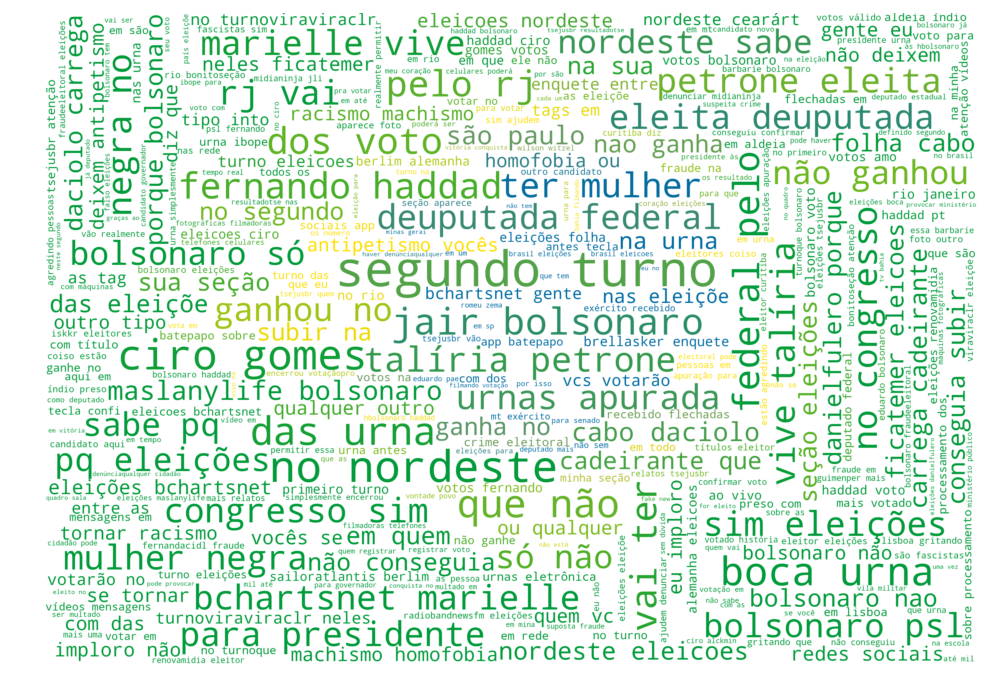

In [234]:
brazilian_flag_mask = np.array(Image.open('brazilian-flag.png'))
generate_wordcloud_timegap(brazilian_flag_mask, 350, 200, 'white', 'brazilian-flag')

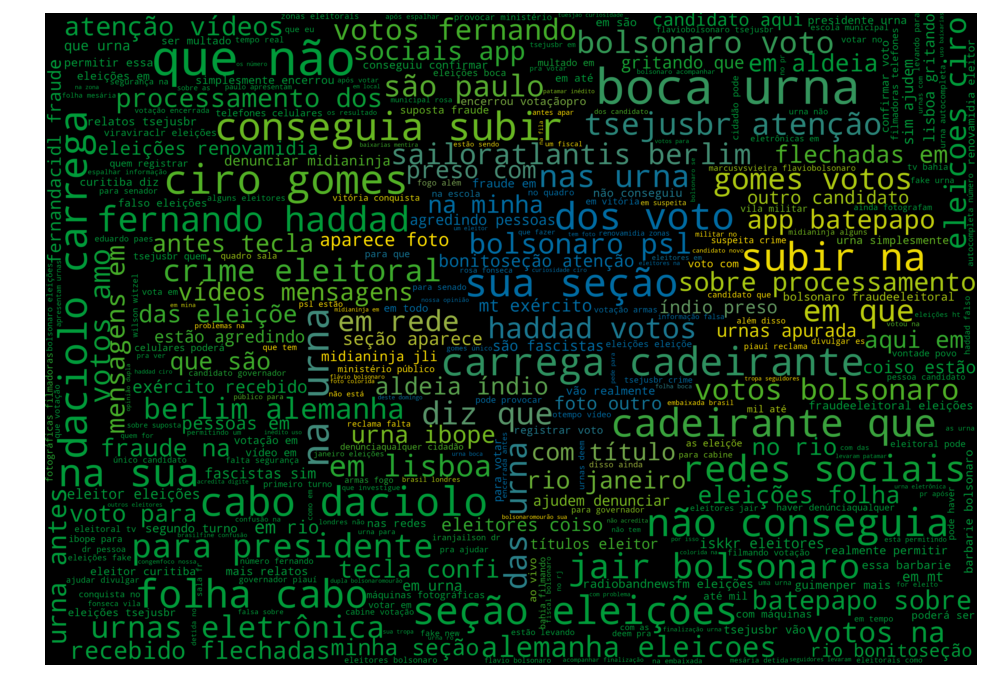

In [242]:
generate_wordcloud_timegap(brazilian_flag_mask, 350, 200, 'black', 'brazilian-flag-8-18', min_gap=8, max_gap=18)

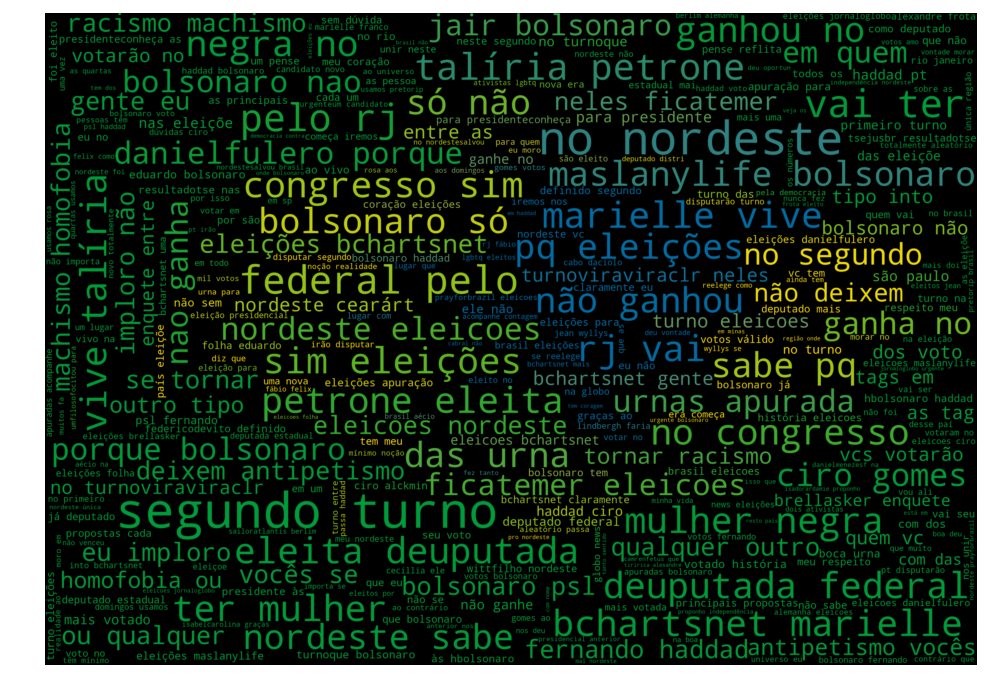

In [241]:
generate_wordcloud_timegap(brazilian_flag_mask, 350, 200, 'black', 'brazilian-flag-19-24', min_gap=19, max_gap=24)